# Sepsis Prediction Model

# 1. Business Understanding


## 1.1 Overview
Sepsis is a serious condition that happens when the body's immune system has an extreme response to an infection. The body's reaction causes damage to its own tissues and organs.Sepsis is a leading cause of death in hospitals. Early prediction and diagnosis of sepsis, which is critical in reducing mortality, is challenging as many of its signs and symptoms are similar to other less critical conditions. We develop an artificial intelligence algorithm, which uses structured data to predict and diagnose sepsis.
In this project, we aim to develop a robust machine learning model for sepsis classification and make it available as a web application using FastAPI for real-time predictions. By creating an API, and deploying it, our model can receive request using the internet protocol as presented by the illustration below.

![API illustration](https://lh3.googleusercontent.com/-qVJ4ZsbjsmH6CnYbojsAR4ImyHV8yxsFVinunH-pX7VCapGvufcXiPak6YVKIrj9ZdiCHwK5UFtQW8yuU5t83pz6fbqN1F2p74OWuT5dObCPnTBuCYr_P1mUg8arbP0WuEt7j_A)

**Source** : *The benefits of Machine Learning APIs - UbiOps*





## 1.2 Objectives 
- **Model Development:** Build a model for Sepsis Prediction Feature that will be used to predict if a patient in ICU will develop sepsis.
- **API Development:** Utilize FastAPI to develop an API endpoint that receives patient data as input and returns predictions of sepsis occurrence using the trained model.
- **Documentation and Testing:** Create comprehensive documentation detailing the model architecture and API endpoints and conduct rigorous testing to ensure the API functions as expected, handling various scenarios and edge cases.
- **Deployment:** Deploy the FastAPI application, ensuring scalability and stability for real-time prediction usage in a production environment.

### To achieve the objectives, the project will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, which is a widely used methodology in data science and machine learning for guiding the lifecycle of a data-centric project and includes the following steps:
- **Data Understanding:** Includes data collection and Exploratory Data Analysis (EDA).
- **Data Preparation:** Includes data cleaning, feature engineering and data splitting.
- **Modeling:** Includes model selection, development, and evaluation.
- **Evaluation:** Includes performance assessment, model interpretation and iteration.
- **Deployment:** Includes model deployment and monitoring and maintenance.

## 1.3 Columns Description

### The dataset is comprised of the following columns:

1. **ID:** Unique number to represent patient ID.
2. **PRG:** Plasma glucose.
3. **PL:** Blood Work Result-1 (mu U/ml).
4. **PR:** Blood Pressure (mm Hg).
5. **SK:** Blood Work Result-2 (mm).
6. **TS:** Blood Work Result-3 (mu U/ml).
7. **M11:** Body mass index (weight in kg/(height in m)^2.
8. **BD2:** Blood Work Result-4 (mu U/ml).
9. **Age:** patients age (years).
10. **Insurance:** If a patient holds a valid insurance card.
11. **Sepssis:** Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise.

## 1.4 Hypothesis
The Project will be guided by the following hypothesis
- **Null hypothesis:** There is no significant difference between the age of the patient and sepsis development
- **Alternate hypothesis:** There is a significant difference between the age of the patient and sepsis development


## 1.5 Research Questions
The questions below are to be answered
1. Is there a correlation between age and the development of sepsis? Does age play a significant role in predicting sepsis?
2. Does having valid insurance correlate with better or earlier diagnosis and treatment, potentially reducing the risk of sepsis?
3. Which features (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) have the highest correlation or impact on predicting sepsis development?
4. Are there specific combinations of factors that significantly increase the risk of sepsis? For instance, does a certain range of PRG, BD2, and TS together with age pose a higher risk?
5. How do various blood parameters correlate to sepsis development? Does specific blood work result be an early indication of developing sepsis?

These questions will guide our understanding of the dataset to build a robust model for sepsis classification.



## Data Understanding

### Installations

In [1]:
%pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#these are the libraries that will be used for the analysis
# Data handling and manipulation
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")
import seaborn as sns 
sns.set_style('whitegrid') # Set the style to 'whitegrid'
import plotly.express as px

# Set the global parameters for Matplotlib
plt.rc('axes', grid=False)

# statistical analysis 
from scipy import stats
from scipy.stats import chi2_contingency

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import cv_scores,FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


#display all columns and rows 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)



# filter warnings
import warnings
warnings.filterwarnings('ignore')
# save model
import pickle
import os

In [3]:
# load the train and test datasets
train = pd.read_csv(r"C:/Users/user/Desktop/P6_Web_Application/Embedding-Machine-Learning-Model-into-Web-Application/Data/Paitients_Files_Train.csv")
test = pd.read_csv(r"C:/Users/user/Desktop/P6_Web_Application/Embedding-Machine-Learning-Model-into-Web-Application/Data/Paitients_Files_Test.csv")

In [4]:
# look into the first 5 rows of the train dataset
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
# look into the first 5 rows of the test dataset
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
# examining information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


There are a total of 599 entries in the train dataset with no non null values

In [7]:
# examining information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


There are a total of 169 entries in the test dataset with no non null values

In [8]:
# check for duplicates
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

There are no duplicates in both the train and test datasets

In [10]:
# look at the descriptive statistics of the numerical columns
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The difference between the mean and the standard deviation in a dataset provides insights into the dispersion or spread of the data around the mean.A higher standard deviation in SK and TS columns indicates that the data points are spread out over a wider range from the mean and thus the presence of outliers. Some patients might exhibit extreme values in certain health parameters, indicating conditions that deviate significantly from the norm. These extreme values might be genuine and reflect specific medical conditions.
The range of the minimum and the maximum values in columns imply the need to scale the data before modelling.

### Exploratory Data Analysis (EDA)

In this section we inspect the datasets in depth and conduct a univariate, bivariate and multivariate analysis and test the hypothesis to further understand the patterns and trends in the dataset.

### Univariate Analysis

In [11]:
train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [12]:
# lets see the distribution of sepsis
sepsis_count = train['Sepssis'].value_counts()
sepsis_count

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

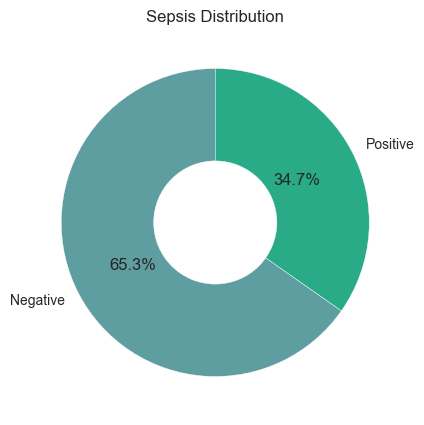

In [13]:
# lets visualize the distribution of sepsis
fig, ax = plt.subplots(figsize=(10, 5))

# Define the colors
jungle_green = (41 / 255, 171 / 255, 135 / 255)
outer_colors = ['cadetblue', jungle_green] 
# Draw the outer pie chart
ax.pie(sepsis_count.values, labels=sepsis_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)

# Draw the inner pie chart to create the doughnut effect
ax.pie([1], colors='white', radius=0.4)

ax.set(aspect='equal')
plt.title('Sepsis Distribution')
plt.show()

From the distribution 34.7% of the patients in the dataset developed sepsis while 65.3% did not, implying imbalanced classes. Dealing with imbalanced classes is crucial as it can bias models towards the majority class and affect predictive performance. Thus there is need to balance the seppis attrubute which is also the target variable before analysis.

In [14]:
# Insurance distribution
train['Insurance'].value_counts()

Insurance
1    411
0    188
Name: count, dtype: int64

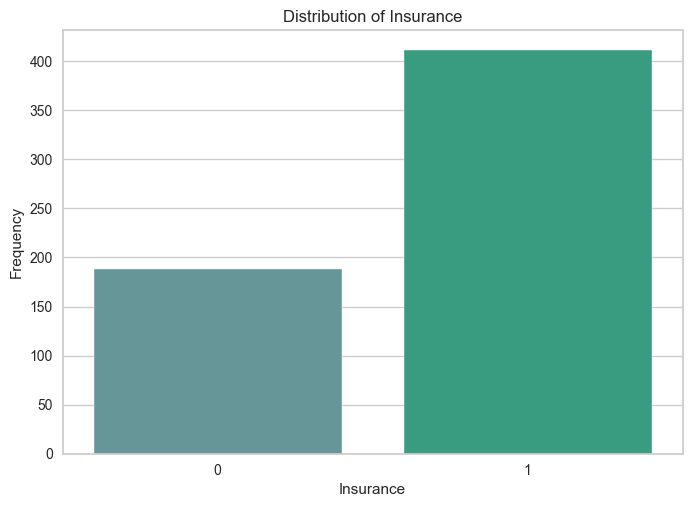

In [15]:
#Plot of Insurance Distribution
# Define colors for each category ('0' and '1' insurance)
colors = ['cadetblue', jungle_green] 

sns.countplot(x=train['Insurance'], palette=colors)
plt.xlabel('Insurance')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance')

plt.show()

### most of the patients have a valid insurance cover

In [16]:
# Age distribution
print(f"Max_Age:{train['Age'].max()}, Min_Age:{train['Age'].min()}")

Max_Age:81, Min_Age:21


In [17]:
# Define age bins
age_bins = [20, 40, 60, 80, 100]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create an age_group column in the DataFrame
train['age_group'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)
train['age_group'].value_counts()


age_group
20 - 39    443
40 - 59    129
60 - 79     26
80 - 99      1
Name: count, dtype: int64

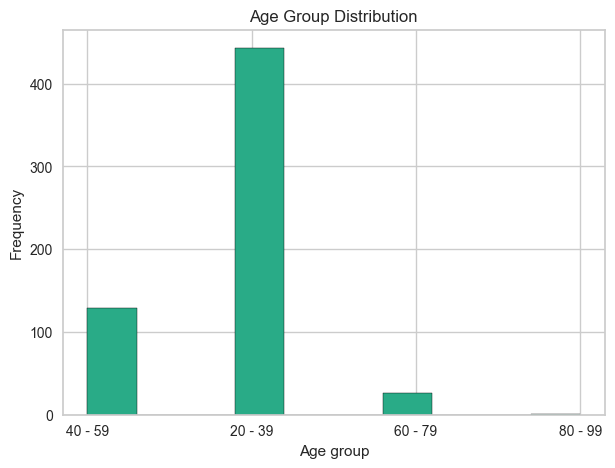

In [18]:
# now lets show the frequency distribution of age
plt.figure(figsize=(7,5))
jungle_green = (41 / 255, 171 / 255, 135 / 255)
plt.hist(train['age_group'], color=jungle_green, edgecolor='black')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.title('Age Group Distribution')
plt.show()

### From the visualization, most of the patients are in the age group between 20-39

### What are the distributions of PRG, PL, PR, SK, TS, M11, BD2, Age? Are there any outliers or skewed distributions?

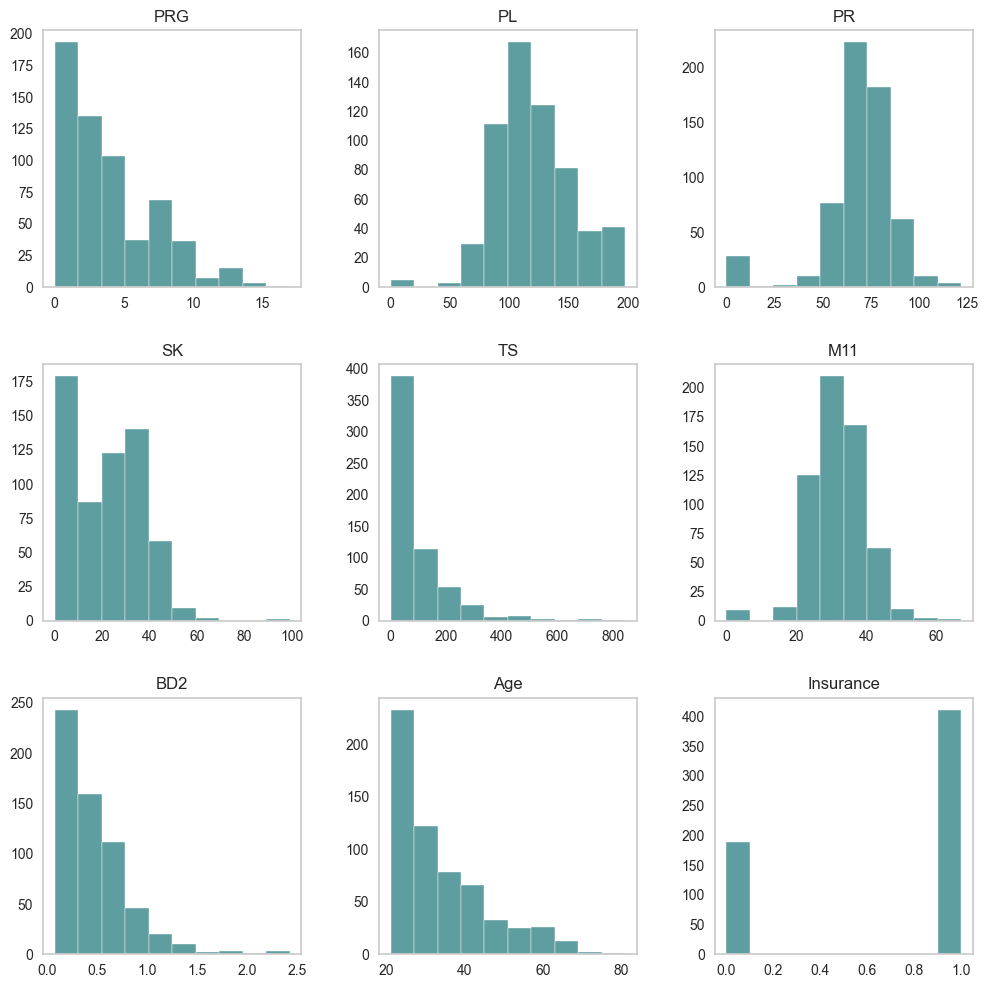

In [19]:
# visualize the distibutions of attributes
train.hist(figsize=(12,12), color= 'cadetblue', grid=False)
plt.show()

From the visualizations we can see that only PR, PL and M11 have normal distributins. PRG, SK, TS, BD2 and Age are positively skewed suggesting that the mean (average) is typically greater than the median (middle value when the data is ordered from smallest to largest). Most of the machine learning models and standardization techniques rely on the fact that the data is normally distibuted or gaussian in nature. So skewed data will require transformation before analysis. In summary, a positively skewed distribution suggests that the data is not symmetrical and has a long right tail.

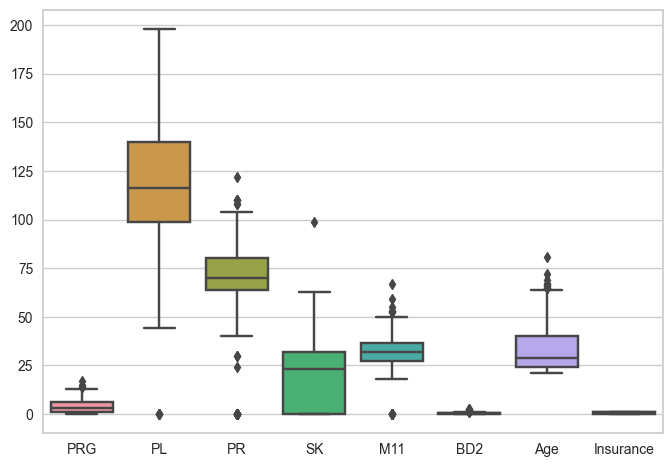

In [20]:
# Visualize the outliers
df=train.drop('TS', axis=1)
sns.boxplot(data=df)
plt.show()

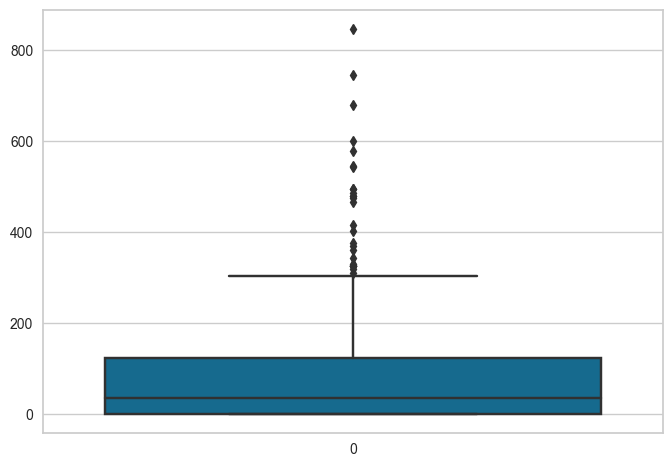

In [21]:
# visualize outliers in TS column
sns.boxplot(data=train['TS'])
plt.show()

From the visualization we can see the presence of a few outliers in each of the columns. Although, Outliers could result from errors in measurement or data entry, they could be genuine data points reflecting extreme values due to specific patient conditions. 

## Bivariate Analysis

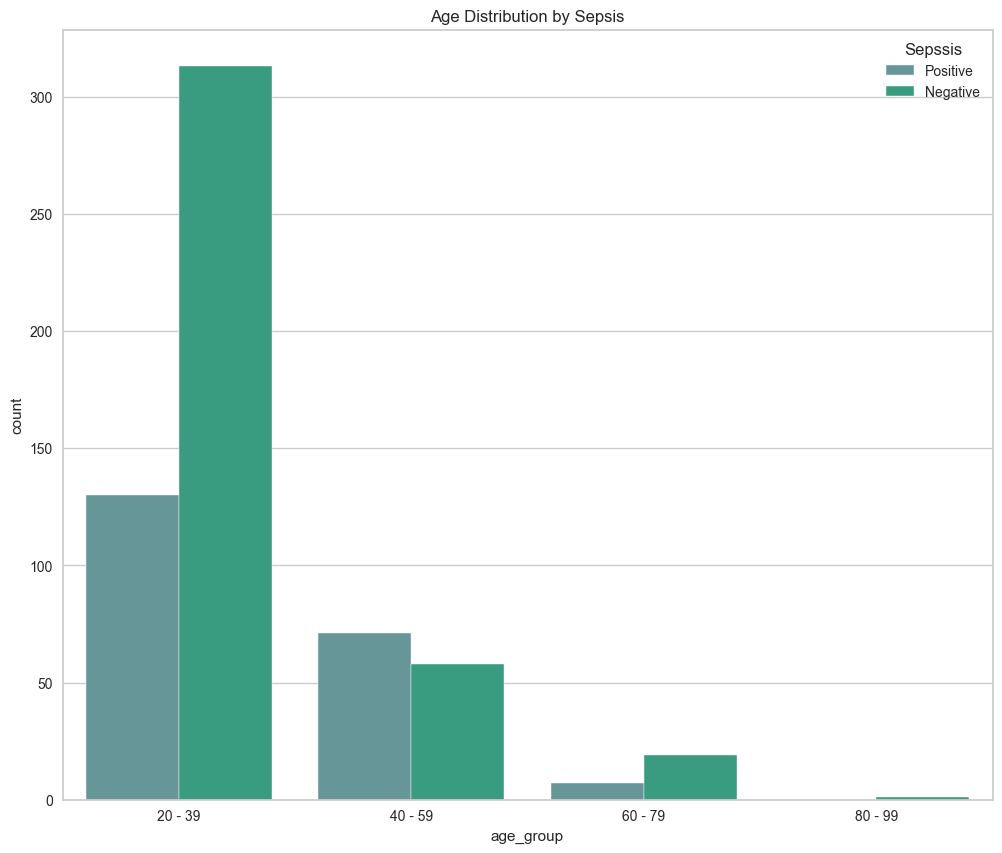

In [22]:
# Analysis for age_group and sespis attributes
plt.figure(figsize=(12, 10))
sns.countplot(x='age_group', hue='Sepssis', data=train, palette=['cadetblue', jungle_green])
plt.title('Age Distribution by Sepsis')
plt.show()

From the visualization we can see that most patients are in the age group between 20-39. however, about 315 of these patients did not develop sepsis while 130 developed sepsis. we can see an increasing trend in patients who developed sepsis among the age groups. Among patients in the age group between 40-59, about 70 were negative while 50 turned positive. Conversly, with patients between 60-79 years, those who turned positive were about 20 out of the 26 in that age bracket and the only patient in the age group between 80-99 developed sepsis. We can conclude that the risk of developing sepsis increases with age as seen in the visualization where older patients are more susceptible than younger patients.

### Analysis of insurance and sepsis

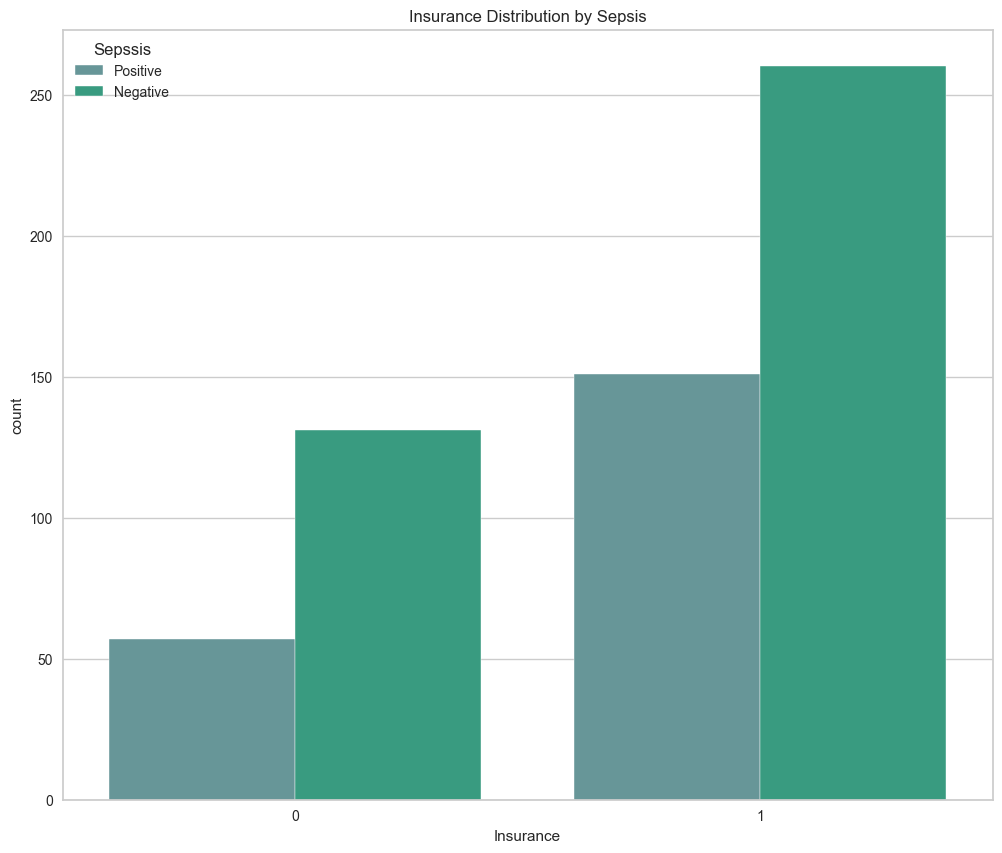

In [23]:
# Analysis for age_group and sespis attributes
plt.figure(figsize=(12, 10))
sns.countplot(x='Insurance', hue='Sepssis', data=train, palette=['cadetblue', jungle_green])
plt.title('Insurance Distribution by Sepsis')
plt.show()

From the visualization, it is clear that most patients have a valid insurance, However, there is no difference in sespis development between patients with or without valid insurances. In both categories, those who did not develop sepsis are more than those who developed sepsis.

In [24]:
train.columns


Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'age_group'],
      dtype='object')

In [25]:
train['M11'].value_counts

<bound method IndexOpsMixin.value_counts of 0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
594    33.6
595    32.0
596    45.3
597    27.8
598    36.8
Name: M11, Length: 599, dtype: float64>

### Analysis of M11(Body Mass Index) by Sepsis

In [26]:
# Define bins and labels
m11_bins = [0, 18.5, 24.9, 29.9, float('inf')]
m11_labels = ['Underweight', 'Normal', 'Overweight','Obese']

# Create a new attribute 'BMI_category' and display the counts
train['BMI_category'] = pd.cut(train['M11'], bins=m11_bins, labels=m11_labels, right=False)
train['BMI_category'].value_counts()

BMI_category
Obese          372
Overweight     136
Normal          78
Underweight     13
Name: count, dtype: int64

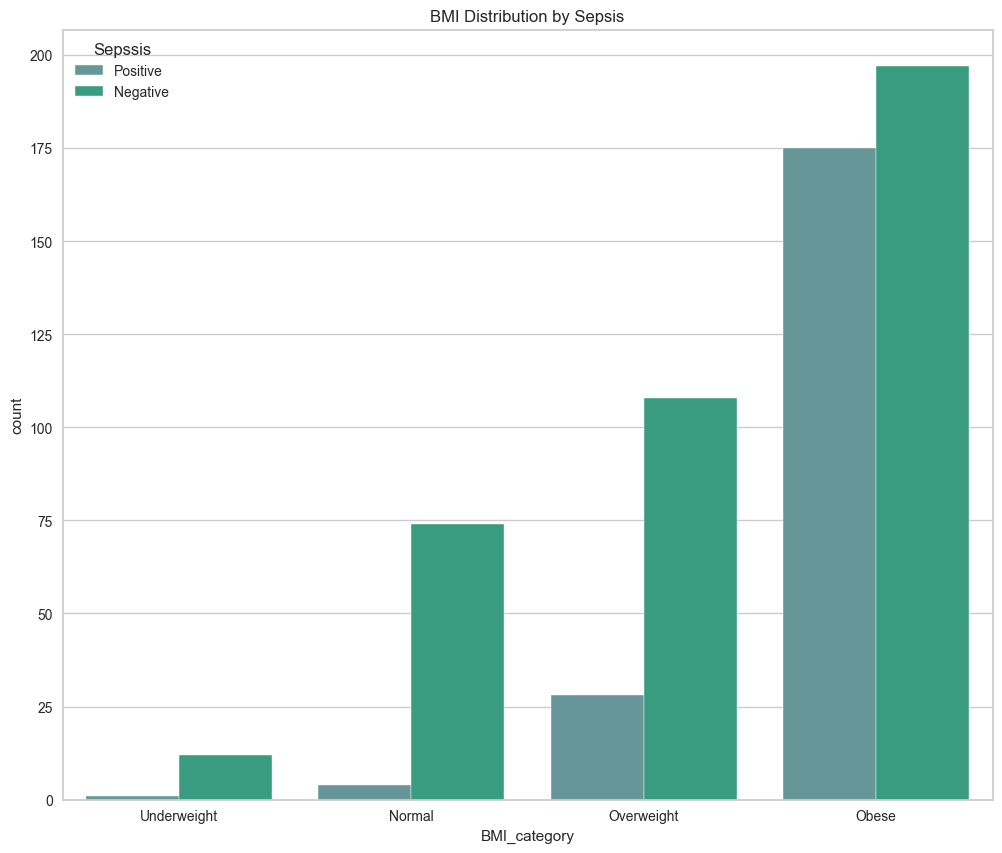

In [27]:
# Analysis for BMI_category and sespis attributes
plt.figure(figsize=(12, 10))
sns.countplot(x='BMI_category', hue='Sepssis', data=train, palette=['cadetblue', jungle_green])
plt.title('BMI Distribution by Sepsis')
plt.show()

There is an increasing trend in sepsis development with increasing BMI levels. Underweight and normal weight Patients recorded very low cases of sepsis, which significantly increases with overweight patients. about 175 of 372 obese patients developed sepsis showing a significant contribution of sespis development by high bmi levels.

### Analysis of continous variables with sepsis

In [28]:
train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'age_group', 'BMI_category'],
      dtype='object')

In [29]:
col=['PRG', 'PL', 'PR', 'SK', 'TS','BD2']

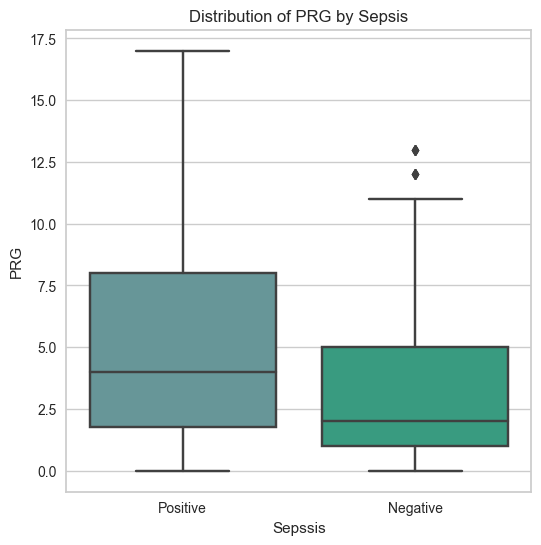

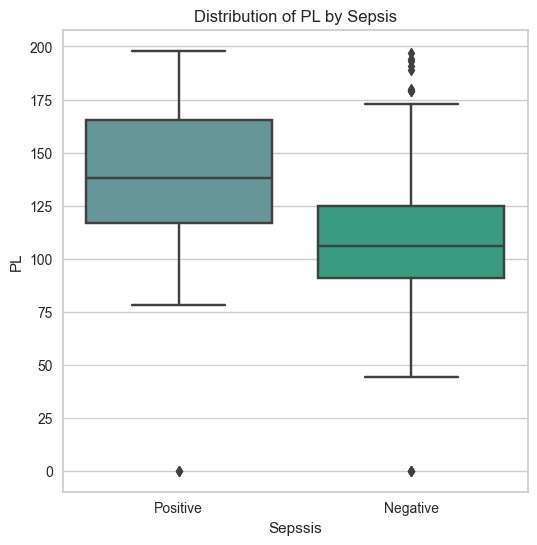

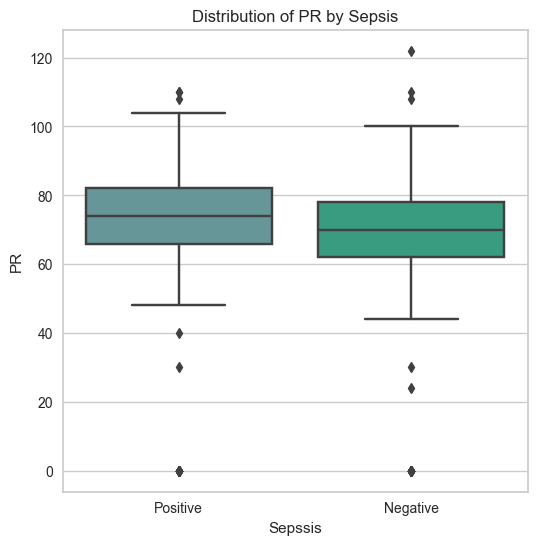

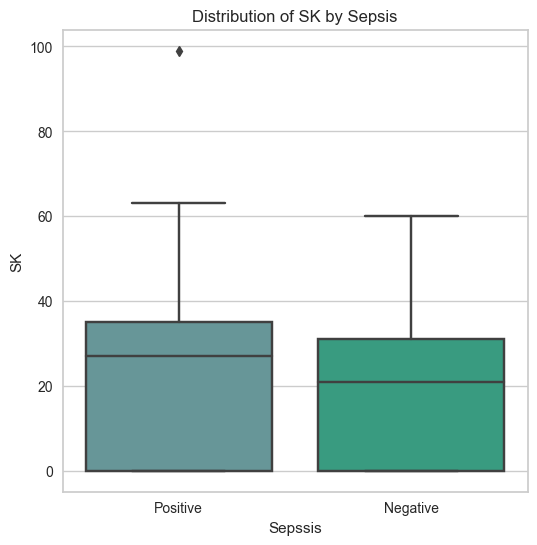

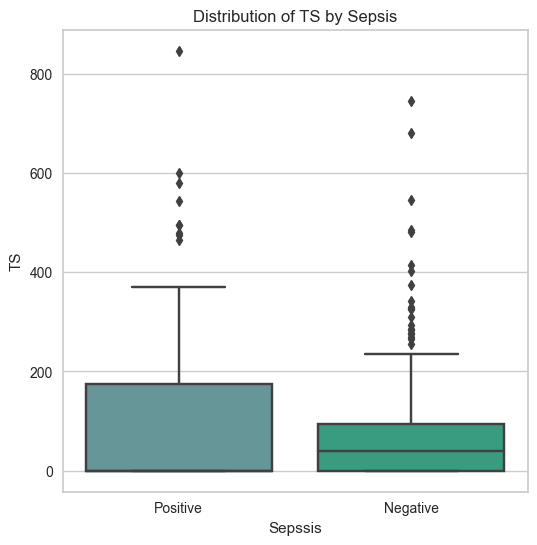

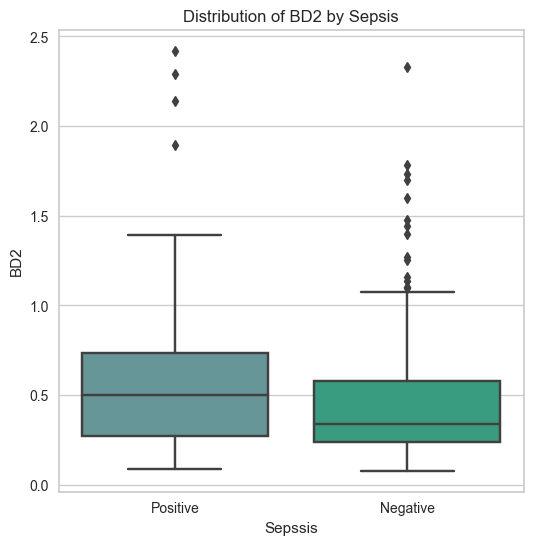

In [30]:
for c in col:
    plt.figure(figsize=(6,6))
    sns.boxplot(x='Sepssis',y=c,data=train, palette=['cadetblue', jungle_green])

    # Set title based on column name
    plt.title(f"Distribution of {c} by Sepsis")
    plt.show()

From the visualizations above, we can observe that the median lines of positive sepsis lies outside of the box of negative sepsis in the PL and TS attributes. This implies that there is likely to be a difference in the Blood Work Result-1 of patients with positive sepsis and those with negative sepsis. similarly, there is likely to be a difference in the  Blood Work Result-3 of patients with positive and negative sepsis. The is likely to be no difference in the rest of the attributes for patients with negative and positive sepsis.

### Multivariate analysis

In [31]:
# Encoding the target variable
train['Sepssis_encoded'] = train['Sepssis'].map({'Negative':0, 'Positive':1})

In [32]:
train_corr = train.corr(numeric_only=True)

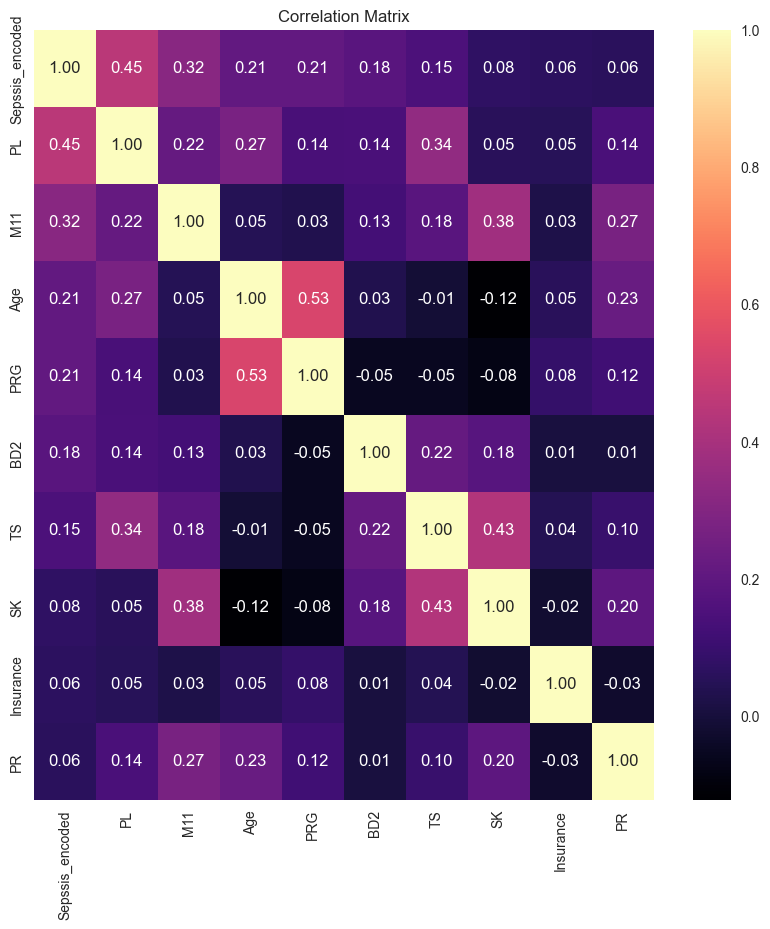

In [33]:
# create a heatmap
target_corr = train_corr['Sepssis_encoded'].sort_values(ascending=False)
sorted_corr = train_corr.loc[target_corr.index, target_corr.index]

plt.figure(figsize=(10,10))
sns.heatmap(data=sorted_corr, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Matrix')
plt.show()

There is significant positive correlation of 0.45 between sepsis and PL(Blood Work Result-1 ) followed by M11(Body mass index) with 0.32. From the heatmap we can also observe a high positive correlation of 0.53 between age and PRG(Plasma glucose) and between TS(Blood Work Result-3 ) and SK(Blood Work Result-2 ). The insurance attribute has a low correlation across all the other attributes, implying its insignificance in the analysis.

## Analytical Questions
1. Is there a correlation between age and the development of sepsis? Does age play a significant role in predicting sepsis?
2. Does having valid insurance correlate with better or earlier diagnosis and treatment, potentially reducing the risk of sepsis?
3. Which features (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) have the highest correlation or impact on predicting sepsis development?
4. Are there specific combinations of factors that significantly increase the risk of sepsis? For instance, does a certain range of PRG, BD2, and TS together with age pose a higher risk?
5. How do various blood parameters correlate to sepsis development? Does specific blood work result be an early indication of developing sepsis?


### 1. Is there a correlation between age and the development of sepsis? Does age play a significant role in predicting sepsis?

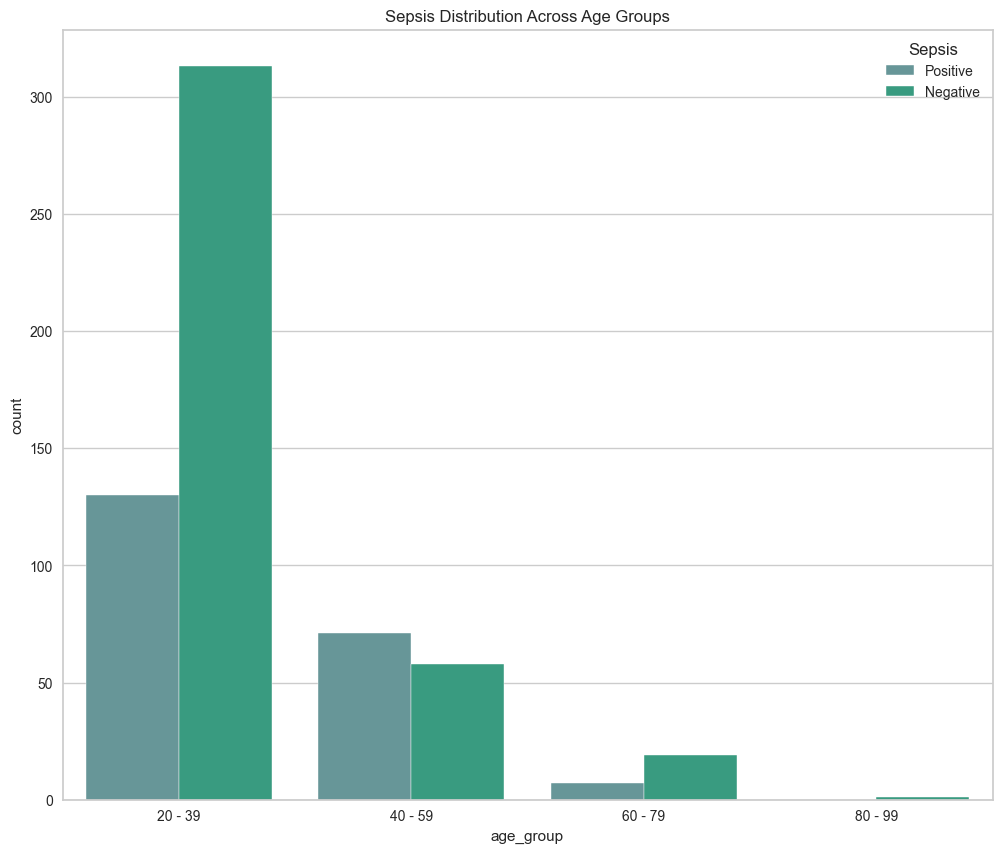

level of significance=0.05,p_value=0.00,chi_2=30.37


In [34]:
# visualize the distribution of sepsis across different age groups
plt.figure(figsize=(12, 10))
sns.countplot(x='age_group', hue='Sepssis', data=train, palette=['cadetblue', jungle_green])
plt.title('Sepsis Distribution Across Age Groups')
plt.legend(title='Sepsis')
plt.show()

# create a contingency table (cross-tabulation) between the 'age_group' and 'Sepssis' columns
gc=pd.crosstab(train['age_group'],train['Sepssis'])
# performing a chi-squared test for independence using the chi2_contingency() function on the gc contingency table we created earlier
chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

### The risk of developing sepsis increases with age as seen in the visualization where older patients are more susceptible than younger patients.
### Since the p-value is less than alpha, we reject Ho and conclude that is there is a statistical significance association between Age and Sepsis development.

### 2. Does having valid insurance correlate with better or earlier diagnosis and treatment, potentially reducing the risk of sepsis?

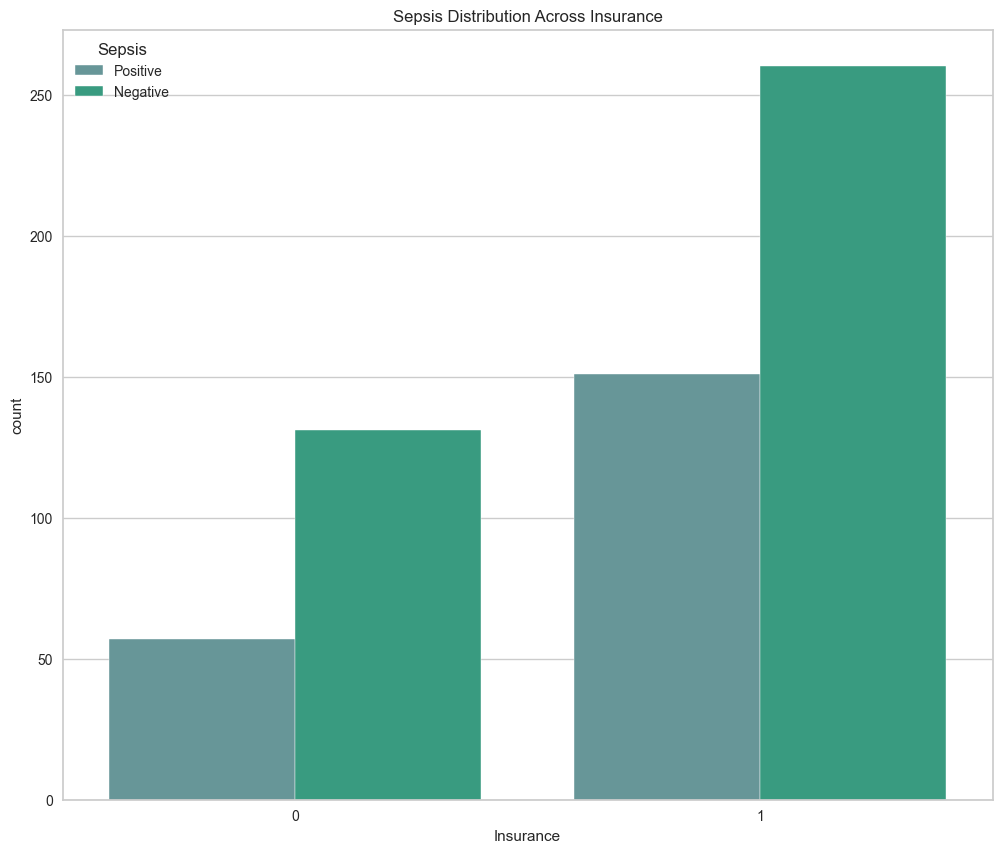

level of significance=0.05,p_value=0.13,chi_2=2.35


In [35]:
# visualize the distribution of sepsis across different age groups
plt.figure(figsize=(12, 10))
sns.countplot(x='Insurance', hue='Sepssis', data=train, palette=['cadetblue', jungle_green])
plt.title('Sepsis Distribution Across Insurance')
plt.legend(title='Sepsis')
plt.show()

# create a contingency table (cross-tabulation) between the 'age_group' and 'Sepssis' columns
hc=pd.crosstab(train['Insurance'],train['Sepssis'])
# performing a chi-squared test for independence using the chi2_contingency() function on the gc contingency table we created earlier
chi_2,p_value,gol,frequency=chi2_contingency(hc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

### It is clear that most patients have a valid insurance, However, there is no difference in sespis development between patients with or without valid insurances. In both categories, those who did not develop sepsis are more than those who developed sepsis. Also, Since the p-value is greater than alpha, we fail to reject Ho and conclude that is there is no statistical significance association between Insurance and Sepsis development. 

### 3. Which features (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) have the highest correlation or impact on predicting sepsis development?

In [36]:
# performing feature selection for sepsis attribute
coff=abs(sorted_corr['Sepssis_encoded'])
coff=coff[coff>0.01]
coff.sort_values(ascending=False)

Sepssis_encoded    1.000000
PL                 0.449719
M11                0.315894
Age                0.210234
PRG                0.207115
BD2                0.181561
TS                 0.145892
SK                 0.075585
Insurance          0.062582
PR                 0.061086
Name: Sepssis_encoded, dtype: float64

### The Features with highest correlation or impact on predicting sepsis development include PL(Blood Work Result-1 ) with 0.45, M11(Body mass index) with 0.32, Age with 0.21, PRG(Plasma glucose) with 0.21 and lastly BD2( Blood Work Result-4) with 0.18.

### 4. Are there specific combinations of factors that significantly increase the risk of sepsis? For instance, does a certain range of PRG, BD2, and TS together with age pose a higher risk?

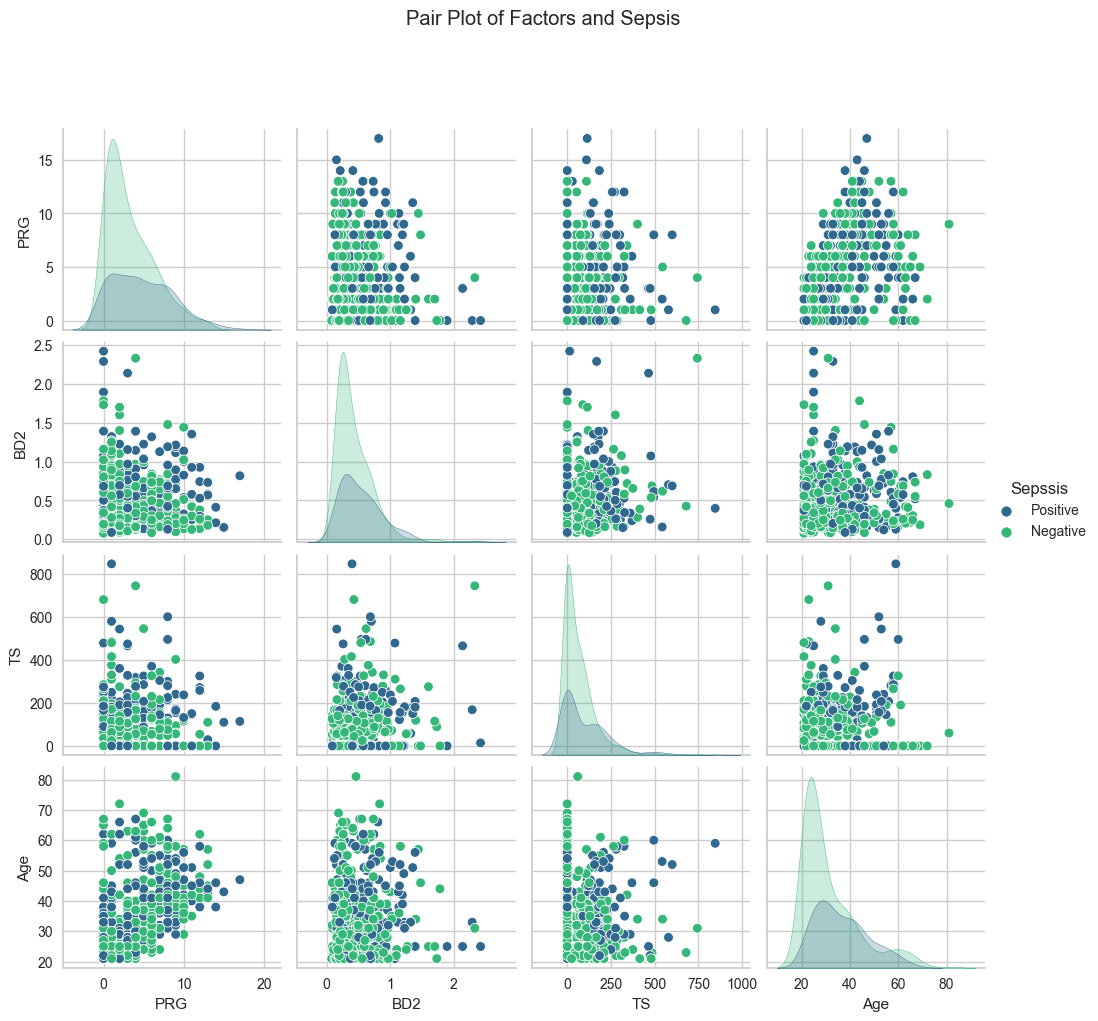

In [37]:


#create a pair plot to visualize the combinations of features
pair_plot = sns.pairplot(train[['PRG', 'BD2', 'TS', 'Age', 'Sepssis']], hue='Sepssis', palette='viridis')
pair_plot.fig.suptitle('Pair Plot of Factors and Sepsis', y=1.02)

# Move the legend to the top right
pair_plot.fig.subplots_adjust(top=0.9, right=0.9)

plt.show()


In the pair plot, the diagonal plots show the distribution of each variable, where they all seem to have slightly right-skewed distributions. Moving to off-diagonal plots, 'PRG' and 'BD2' exhibit a moderate positive linear relationship, especially for instances where 'Sepssis' is true, where BD2 is greater than 1 highlighted by the distinct pattern in color. There's an interesting observation in the 'Age' vs. 'TS' plot, where sepsis instances seem to cluster where age is above 40 and where TS values are around 250, possibly indicating a combined effect. Outliers are notably present, and most variables showcase a spread-out distribution.

### 5. How do blood parameters correlate to sepsis development? Does specific blood work result be an early indication of developing sepsis?

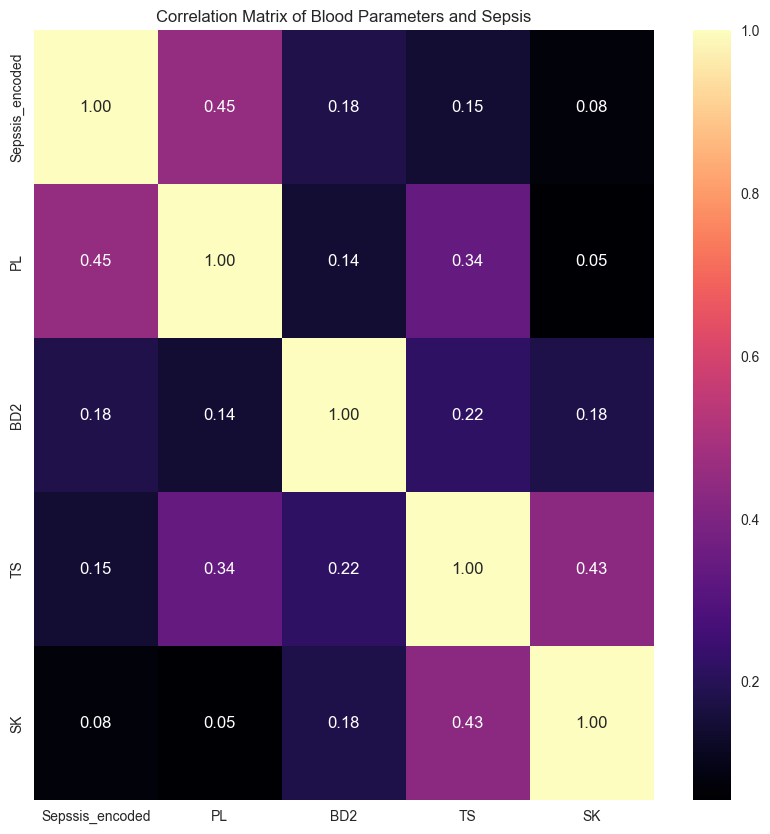

In [38]:
# select columns for blood work result 1-4 and create a DataFrame
blood_result = ['PL','SK','TS','BD2','Sepssis_encoded']
blood_df = train[blood_result]

# calculate the correlation matrix
corr_matrix = blood_df.corr()
# plot the matrix
target_corr = corr_matrix['Sepssis_encoded'].sort_values(ascending=False)
sorted_corr = corr_matrix.loc[target_corr.index, target_corr.index]

plt.figure(figsize=(10,10))
sns.heatmap(data=sorted_corr, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Matrix of Blood Parameters and Sepsis')
plt.show()

PL(Blood Work Result-1) has the highest positive correlation with sepsis of 0.45, and could be used as an early indication of a patient developing sepsis.

### Hypothesis Testing
- **Null hypothesis (HO):** There is no significant difference between the age of the patient and sepsis development
- **Alternate hypothesis (H1):** There is a significant difference between the age of the patient and sepsis development



In [39]:
# create a contingency table (cross-tabulation) between the 'age_group' and 'Sepssis' columns
gc=pd.crosstab(train['age_group'],train['Sepssis'])
# performing a chi-squared test for independence using the chi2_contingency() function on the gc contingency table we created earlier
chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05

# Display results
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

# Check and print statistical significance
if p_value < alpha:
    print("Reject the null hypothesis.There is a statistical significant difference between the age of the patient and sepsis development.")
else:
    print("Fail to reject the null hypothesis.There is no statistical significant difference between the age of the patient and sepsis development.")

level of significance=0.05,p_value=0.00,chi_2=30.37
Reject the null hypothesis.There is a statistical significant difference between the age of the patient and sepsis development.


- Since the p-value is less than alpha, we reject Ho and conclude that is there is a statistical significance association between age groups and the occurence of sepsis.
- The result suggest that certain age groups are more susceptible to sepsis than others.

## Data Preparation

In [40]:
# drop the columns we created in EDA
train = train.drop(columns=['age_group','BMI_category', 'Sepssis_encoded','ID'])

In [41]:
df_train= train.copy()

### Handle Outliers

In [42]:
df_train.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [43]:
# Select numeric columns to remove outliers
columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Remove outliers using IQR method for each column
for col in columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter values within the bounds
    df_train= df_train[(df_train[col] >= lower_bound) & (train[col] <= upper_bound)]

    # Display the cleaned data
    print("Original shape:", train.shape)
    print("Shape after removing outliers:", df_train.shape)


Original shape: (599, 10)
Shape after removing outliers: (595, 10)
Original shape: (599, 10)
Shape after removing outliers: (590, 10)
Original shape: (599, 10)
Shape after removing outliers: (553, 10)
Original shape: (599, 10)
Shape after removing outliers: (552, 10)
Original shape: (599, 10)
Shape after removing outliers: (524, 10)
Original shape: (599, 10)
Shape after removing outliers: (518, 10)
Original shape: (599, 10)
Shape after removing outliers: (503, 10)
Original shape: (599, 10)
Shape after removing outliers: (493, 10)


In [44]:
df_train.shape

(493, 10)

In [45]:
# separate the dependent and independent/target variable
X = df_train.drop('Sepssis', axis=1)
y = df_train['Sepssis']


## Create a pipeline

In [46]:
input_features = X.columns
preprocessor = ColumnTransformer(
    transformers= [
        ('scaler', StandardScaler(),input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

## Balance the target variable

In [47]:
y.value_counts()

Sepssis
Negative    337
Positive    156
Name: count, dtype: int64

In [48]:
# Apply SMOTE to balance the data. 
# SMOTE generates synthetic samples for the minority class to match the number of samples in the majority class.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled, = smote.fit_resample(X, y)

# Print the value counts of the target variable before and after applying SMOTE to verify that the classes are balanced.
print("Before SMOTE:")
print(y.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Sepssis
Negative    337
Positive    156
Name: count, dtype: int64

After SMOTE:
Sepssis
Positive    337
Negative    337
Name: count, dtype: int64


In [49]:
# Split the data into training and evaluation sets
X_test = test
X_train, X_eval, y_train, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape),(X_eval.shape, y_eval.shape),(X_test.shape)

(((539, 9), (539,)), ((135, 9), (135,)), (169, 10))

## Encode the Target

In [50]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [51]:
print(y_train_encoded)

[0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 0 

## Modelling

Model: RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78        71
           1       0.72      0.91      0.81        64

    accuracy                           0.79       135
   macro avg       0.81      0.80      0.79       135
weighted avg       0.81      0.79      0.79       135



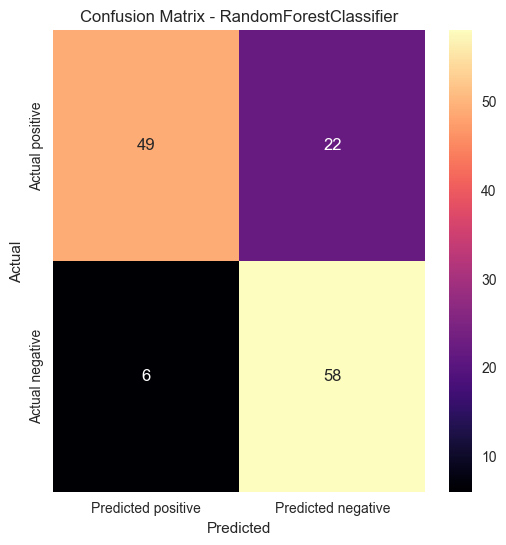

..............................................
Model: LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        71
           1       0.69      0.75      0.72        64

    accuracy                           0.72       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.72      0.72      0.72       135



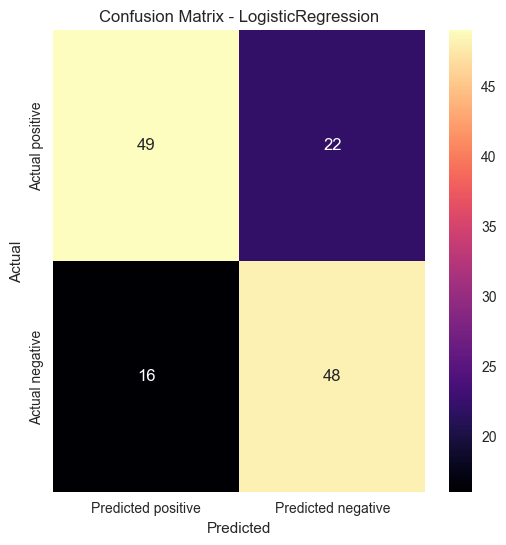

..............................................
Model: SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        71
           1       0.69      0.72      0.70        64

    accuracy                           0.71       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.71      0.71      0.71       135



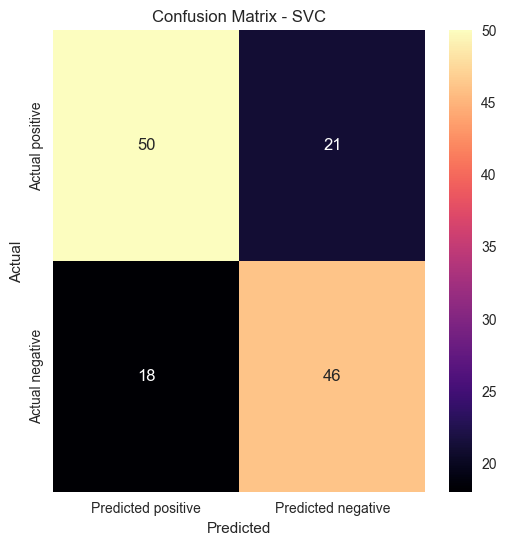

..............................................
Model: DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        71
           1       0.76      0.83      0.79        64

    accuracy                           0.79       135
   macro avg       0.79      0.79      0.79       135
weighted avg       0.80      0.79      0.79       135



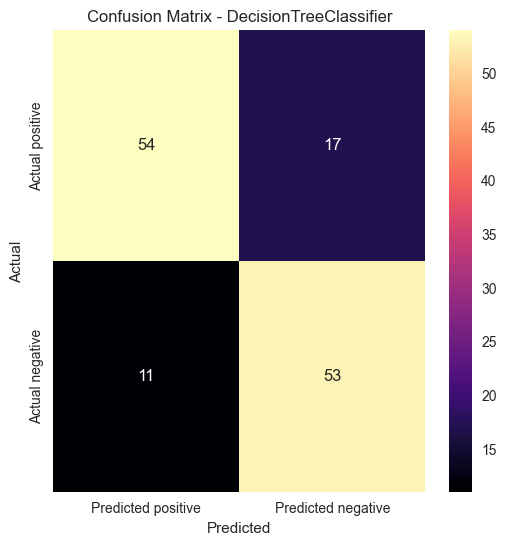

..............................................
Model: GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80        71
           1       0.74      0.91      0.82        64

    accuracy                           0.81       135
   macro avg       0.82      0.81      0.81       135
weighted avg       0.82      0.81      0.81       135



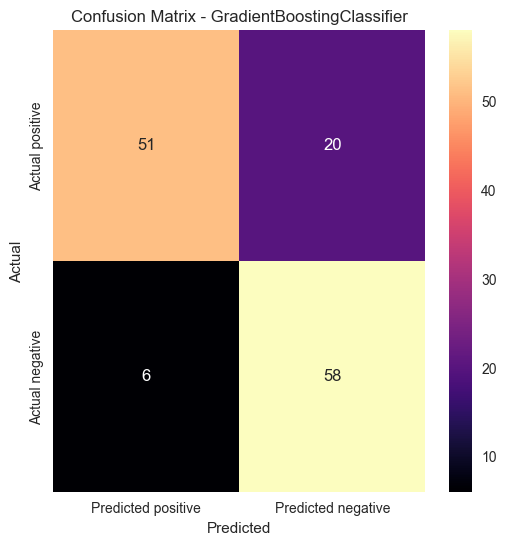

..............................................
Model: XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        71
           1       0.79      0.88      0.83        64

    accuracy                           0.83       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.83      0.83      0.83       135



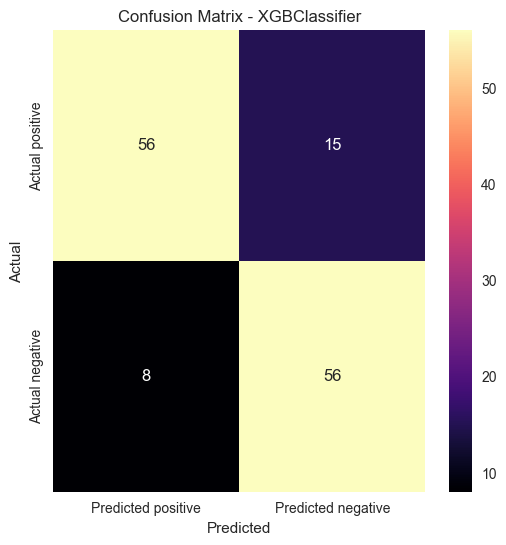

..............................................


,Model,Accuracy,Precision,Recall,F1,ROC AUC
5,XGBClassifier,0.829630,0.788732,0.875000,0.829630,0.831866
4,GradientBoostingClassifier,0.807407,0.743590,0.906250,0.816901,0.812280
0,RandomForestClassifier,0.792593,0.725000,0.906250,0.805556,0.798195
3,DecisionTreeClassifier,0.792593,0.757143,0.828125,0.791045,0.794344
1,LogisticRegression,0.718519,0.685714,0.750000,0.716418,0.720070
2,SVC,0.711111,0.686567,0.718750,0.702290,0.711488


In [52]:
# list of models to be used for training
models = [RandomForestClassifier(random_state=42), LogisticRegression(), SVC(), DecisionTreeClassifier(),
           GradientBoostingClassifier(), XGBClassifier()]

# creating empty list to store the models and evaluation metrics
metrics = []

# iterate over each model to create a pipeline and train the models
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # make predictions on the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate evalution metrics
    accuracy = accuracy_score(y_eval_encoded, y_pred)
    precision = precision_score(y_eval_encoded, y_pred)
    recall = recall_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)

    # Append the trained models and netrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1": f1,
                    "ROC AUC": roc})
    # print the classification report
    print("Model:", model.__class__.__name__)
    report = classification_report(y_eval_encoded, y_pred)
    print("Classification Report: \n", report)

    # Display the confusion matrix
    cm = confusion_matrix(y_eval_encoded, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Predicted positive', 'Predicted negative'], yticklabels=['Actual positive', 'Actual negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    print("..............................................")


# display the models performance in a DataFrame
performance = pd.DataFrame(metrics)
performance = performance.sort_values(by="Accuracy", ascending=False)
style = performance.style.background_gradient(cmap='magma')
style


# Evaluation

### XGBClassifier has the highest accuracy score of 83% followed by GradientBoosting Classifiers with 81% and RandomForest with 79%.

### Performance Assessment with ROC

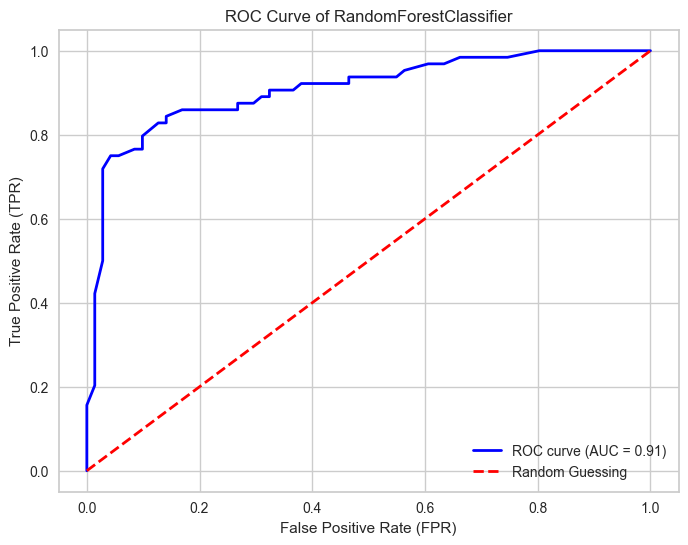

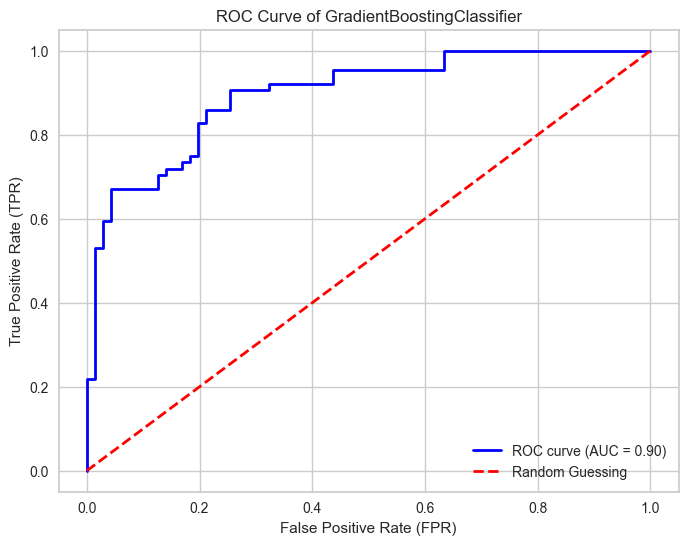

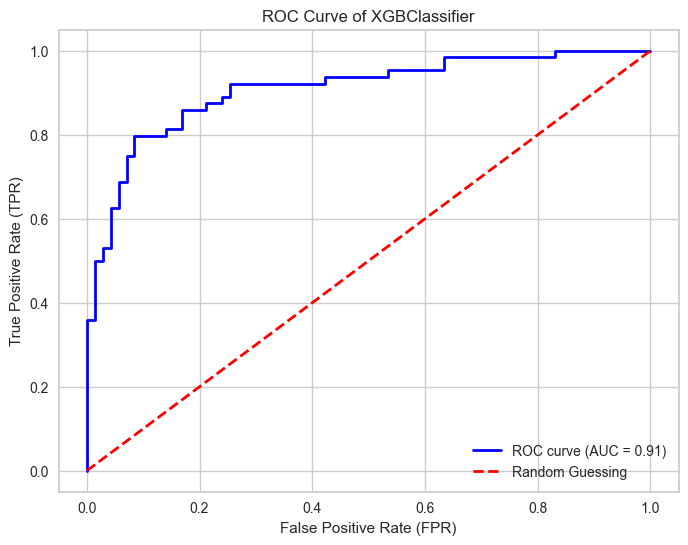

In [54]:
models = [RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]

# creating empty list to store the models and evaluation metrics
metrics = []

# iterate over each model to create a pipeline and train the models
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])




    # fit the model on training set
    pipeline.fit(X_train, y_train_encoded)

    # predict on evaluation set
    y_pred_proba = pipeline.predict_proba(X_eval)[:, 1] # retrieve the predicted probabilities for the positive class

    # computing the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title("ROC Curve of " + model.__class__.__name__)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### The point closest to the top-left corner (ideal point) on the ROC curve signifies the best trade-off between true positive and false positive rates. The AUC score represents the overall performance of the model. A higher AUC (closer to 1) indicates better discrimination ability irrespective of the threshold. XGBClassifier and the RandomForestClassifier have the highest AUC's of 0.91, hence high performing models in predicting sepsis.

### Model Improvement

In [55]:
# Define models for improvement
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier()

# Define the parameters for each model

rfparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

xgbparam_grid ={
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth':[3,4,5]
}

models = [rf, xgb]
params = [rfparam_grid, xgbparam_grid]

# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
for model, param_grid in zip(models,params):
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', refit=True, cv=5, n_jobs=-1, verbose=3)

    # Fit the GridSearchCV object to your training data
    grid_search.fit(X_train, y_train_encoded)

    # Print the best hyperparameters 
    print(model.__class__.__name__, "Best Hyperparameters:", grid_search.best_params_)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits
RandomForestClassifier Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBClassifier Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


Model: RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.73      0.79        71
           1       0.75      0.88      0.81        64

    accuracy                           0.80       135
   macro avg       0.81      0.80      0.80       135
weighted avg       0.81      0.80      0.80       135



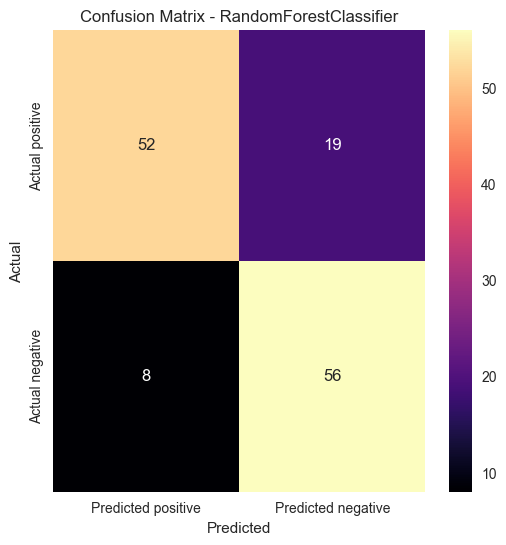

..............................................
Model: XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        71
           1       0.81      0.88      0.84        64

    accuracy                           0.84       135
   macro avg       0.85      0.85      0.84       135
weighted avg       0.85      0.84      0.84       135



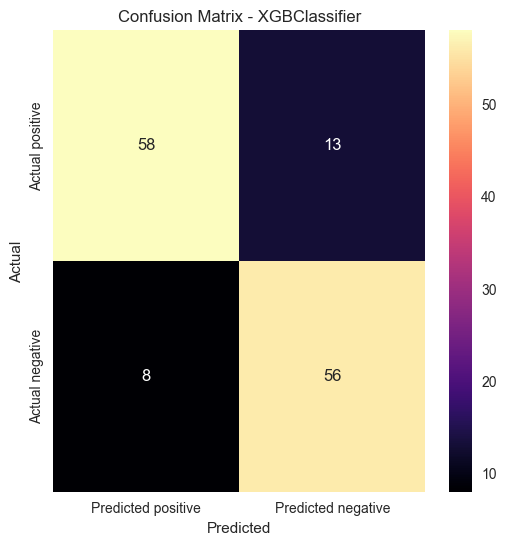

..............................................


,Model,Accuracy,Precision,Recall,F1,ROC AUC
1,XGBClassifier,0.844444,0.811594,0.875000,0.842105,0.845951
0,RandomForestClassifier,0.800000,0.746667,0.875000,0.805755,0.803697


In [56]:
# Final models with best params
best_rf = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
best_xgb = XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators = 100)

# final models in a list
models = [best_rf, best_xgb]

# creating empty list to store the models and evaluation metrics
metrics = []

# iterate over each model to create a pipeline and train the models
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # make predictions on the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate evalution metrics
    accuracy = accuracy_score(y_eval_encoded, y_pred)
    precision = precision_score(y_eval_encoded, y_pred)
    recall = recall_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)

    # Append the trained models and netrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1": f1,
                    "ROC AUC": roc})
    # print the classification report
    print("Model:", model.__class__.__name__)
    report = classification_report(y_eval_encoded, y_pred)
    print("Classification Report: \n", report)

    # Display the confusion matrix
    cm = confusion_matrix(y_eval_encoded, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Predicted positive', 'Predicted negative'], yticklabels=['Actual positive', 'Actual negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    print("..............................................")

# display the models performance in a DataFrame
performance = pd.DataFrame(metrics)
performance = performance.sort_values(by="Accuracy", ascending=False)
style = performance.style.background_gradient(cmap='magma')
style



The RandomForest model has improved from an accuracy score of 79% to 80%  and the XGB improved to an accuracy score of 84% from 83%. Hence, we pick the XGB Classifier as the best model with the highest accuracy of predicting Sepsis.

In [57]:
# Save the pipeline
model = XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators = 100)
xgb_pipeline =Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [58]:
# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('model',
                 XGBClassifier(base_sco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [59]:
# Export the pipeline
with open("src/xgb_pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)


In [ ]:
# Export the encoder
with open("src/encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

In [ ]:
# save the list of installed Python packages along with their versions into a text file
!pip freeze >requirements.text